# Comparando metodos de agrupamiento
En muchas aplicaciones de Clustering y artículos académicos, es común apreciar comparaciones entre métodos o algorítmos de agrupamiento, esto se da ya que los resultados son muy variados y dependen del dataset, los parámetros utilizados y las métricas analizadas. Encontrar el mejor fit es una tarea interesante y que ayuda a profundizar sobre los diferentes métodos de agrupamiento.

Otra característica a tomar en cuenta de los datos a analizar en diferentes aplicaciones, es que los datasets vienen en formatos específicos y muchas veces no visibles de forma fácil sin un procesamiento adecuado; un conjunto de datos "a ciegas".

En este caso se analizará un dataset en formato de salida (output) codificado de forma que no es visible en cualquier aplicación, para ello se procesan los datos con los paquetes de Python para este fin. 

Los datos representan la salida de una aplicación de Red Neuronal, capturas de señales de los músculos responsables del movimiento de los dedos de la mano en una protesis EMG. La electromiografía (EMG) consta en colocar electrodos superficiales sobre la extremidad seleccionada por medio de electrodos conectados a un sensor 
mioeléctrico cuya salida va a una tarjeta de adquisición de datos.

El entrenamiento de los datos en el sistema se realiza por medio de un sistema RNA. Las RNA se definen como un sistema de mapeo no lineales. Constan de un número de procesadores simples ligados por conexiones con pesos.

Las unidades de procesamiento se denominan neuronas. Cada unidad recibe entradas de otros nodos y generan una salida simple escalar que depende de la información local disponible, y guardada internamente o que llega a través de las conexiones con pesos. Estos son datos los obtenidos y se desean analizar por medio de clustering para determinar las principales relaciones entre sí, definiendo así grupos de accion neuronal.

In [25]:
# Imports y Configuracion de plot y seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time

%matplotlib inline

sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

## Se cargan los datos de la aplicación EMG

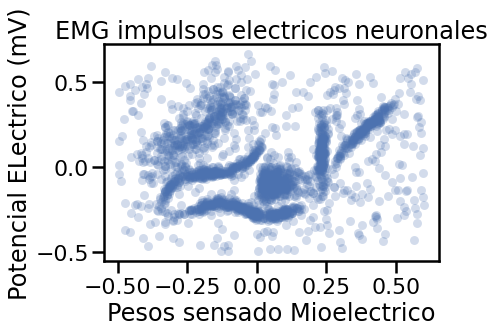

In [26]:
# Se utiliza la funcion load de numpy para cargar los datos
data_EMG = np.load('../datasets/EMG Red neuronal Protesis.npy')

# Visualizamos de forma rapida los datos leido
plt.scatter(data_EMG.T[0], data_EMG.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.set_title("EMG Impulsos Eléctricos Neuronales")
frame.set_xlabel("Pesos sensado Mioeléctrico")
frame.set_ylabel("Potencial Eléctrico (mV)")
frame.axes.get_xaxis().set_visible(True)
frame.axes.get_yaxis().set_visible(True)

## Funcion para plotear graficos
Para comparar diferentes métodos de agrupamiento, se requiere de un proceso de prueba homogeneo para cada uno, por ello, se emplea un metodo automático para aplicar el algoritmo seleccionado bajo mismas ocndiciones y graficar los resultados. El codigo ha sido adaptado de la página oficial de la libreria hdbscan, github.

In [27]:
# Se define la funcion para graficar
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()                                                # Permite medir el tiempo empleado por cada algoritmo, para su comparación.
    labels = algorithm(*args, **kwds).fit_predict(data)                     # Se obtienen las etiquetas de agrupamiento generadas por cada algoritmo.
    end_time = time.time()                                                  # Se cierra el periodo de tiempo empleado en esa llamada al algoritmo 
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)        # Se define la paleta de colores para el ploteo        
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]    # Se asignan los colores a cada etiqueta o cluster generado            
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)                # Se Configura el gráfico usando puntos de dispersion, con los colores asignados 
    frame = plt.gca()                                                       # Se asigna el conjnto de datos a graficar        
    # Se definen las caracteristicas del grafico, leyenda, ejes y tiempo empleado
    frame.set_xlabel("Pesos sensado Mioeléctrico", fontsize=16)
    frame.set_ylabel("Potencial Eléctrico (mV)", fontsize=16)
    frame.axes.get_xaxis().set_visible(True)
    frame.axes.get_yaxis().set_visible(True)    

    plt.title('EMG Impulsos Eléctricos Neuronales - Clusters encontrados con {}'.format(str(algorithm.__name__)), fontsize=16)
    plt.text(-0.5, 0.65, 'Tiempo: {:.2f} s'.format(end_time - start_time), fontsize=12)

# Comparativa de métodos
## Usando KMEANS

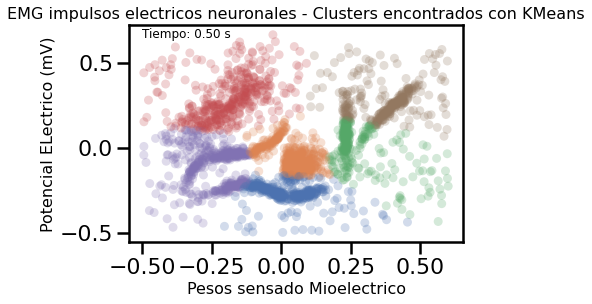

In [28]:
# se llama a la función definida, usando el dataset procesado, el método kmeans y un número de cluster de 6.
plot_clusters(data_EMG, cluster.KMeans, (), {'n_clusters':6})  

Se pueden apreciar los 6 clusters indicados, y el hecho de poder distinguirlos a simple vista indica que el agrupamiento es aceptable. Se recomienda utilizar el método del codo de Jambú para encontrar el número de Clusters óptimo. (ver aplicación de KMeans) 

## Usando Propagación por Afinidad (Affinity Propagation)
La propagación de afinidad es un algoritmo de agrupación más nuevo que utiliza un enfoque basado en gráficos para permitir que los puntos "voten" por su "ejemplo" preferido. El resultado final es un conjunto de "ejemplos" de agrupaciones de las que derivamos agrupaciones básicamente haciendo lo que hace K-Means y asignando cada punto al grupo de su ejemplar más cercano. 

https://www.scielo.br/j/bcg/a/s3rpjYbQHs5PBRVnsW4CkKS/?lang=en

/home/bran/.local/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


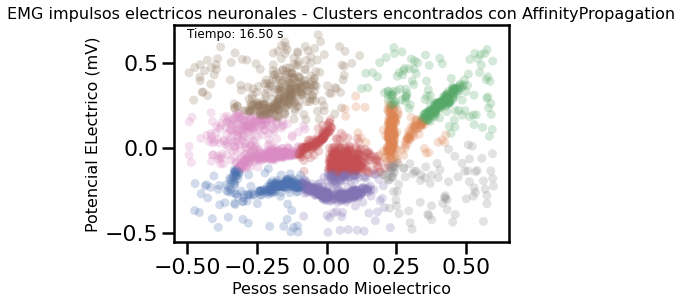

In [29]:
# Se llama a la función definida utilizando el dataset procesado, el algoritmo de afinidad y dos parametros de configuración: 
# Preference indica la probabilidad de que se seleccione el i-ésimo punto como ejemplo.
# La preferencia se pueden establecer en un valor global o para puntos de datos particulares.
# Damping factor: El factor de amortiguación (entre 0,5 y 1) es la medida en que el valor actual se mantiene en relación con los valores entrantes. Esto con el fin de evitar oscilaciones numéricas al actualizar estos valores
plot_clusters(data_EMG, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95}) 

Se puede apreciar que este método generó 8 clusters diferentes, es decir categorizó más detalladamente el dataset, sin embargo esto no garantiza que sea la mejor representación. Además se puede ver que tardó mucho tiempo más que KMeans. Variando los parámetros de entrada se pueden obtener diferentes resultados.

## Usando Cambio promedio (Mean Shift)
El cambio promedio es otra opción si no se desea especificar el número de grupos. Está basado en centroides (K-centroids), como K-Means y propagación por afinidad, pero puede devolver clústeres en lugar de una partición. La idea subyacente del algoritmo Mean Shift es que existe alguna función de densidad de probabilidad de la que se extraen los datos y trata de colocar centroides de grupos en los máximos de esa función de densidad.

/home/bran/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass bandwidth=0.175 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


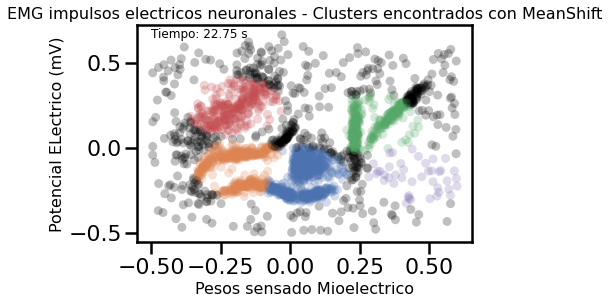

In [34]:
# Se llama a la fundión definida y se selecciona el parametro cluster_all como false: 
# Si fuese verdadero, entonces todos los puntos están agrupados, incluso aquellos huérfanos que no están dentro de ningún grupo. Los huérfanos (outliers) se asignan al nucleo más cercano. Si es falso, los datos atípicos reciben la etiqueta de agrupación -1.
# Por otro lado, se puede pasar el argumento bandwith (float) que a su vez se le pasaría al metodo MeanShift, indicando el ancho de banda del proceso, que configura estados de escalabilidad (debilidad de este método). Si no se proporciona, un método de sklear lo calcula y setea automáticamente.
plot_clusters(data_EMG, cluster.MeanShift, (0.175,), {'cluster_all':False})

## Usando Clustering Espectral 
La agrupación espectral se puede considerar mejor como una agrupación de gráficos. Para datos espaciales, se puede pensar en generar un gráfico basado en las distancias entre puntos como un gráfico k-NN,o de densidades. A partir de ahí, la agrupación espectral examinará los vectores propios del Laplaciano del gráfico para intentar encontrar una buena conjunción del gráfico en el espacio euclidiano. En este caso podemos pensar en términos de distancias, espacio y densidades.

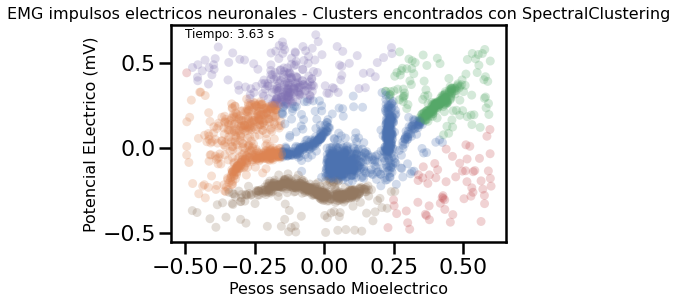

In [35]:
# Se llama a la función definida, con el clustering espectral un número de clusters de 6, al igual de Kmeans
plot_clusters(data_EMG, cluster.SpectralClustering, (), {'n_clusters':6})

Muy similar a Kmeans, este método resulta útil para datos muy ordenados o delgados, nuevamente el ruido afecta en gran medida su desempeño.

## Usando DBSCAN
DBSCAN es un algoritmo basado en densidad: asume clústeres para regiones densas. No requiere que cada punto se asigne a un clúster y, por lo tanto, no particiona los datos, sino que extrae los clústeres 'densos' y deja un fondo disperso clasificado como 'ruido'. Es decir, tiene facilidad para distinguir los datos atípicos. Existe una variación mejorada de este método usando clustering jerárquico, llamado HDBSCAN. (ver "Generación de energía").

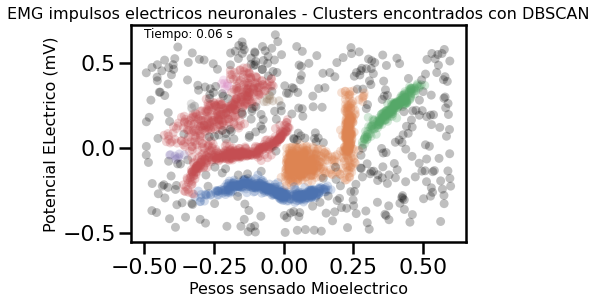

In [37]:
# En este caso se tiene otros parámetros muy diferentes que se pueden seleccionar, pero en generar se recomienda solo manipular y variar el parámetro épsilo:
# Los enlaces simples del algoritmo generan un dendograma espacial, que debe ser cortado, este nivel de corte se da en el valro designado por epsilo (que reulta muy gráfico y empírico)
plot_clusters(data_EMG, cluster.DBSCAN, (), {'eps':0.025})

Como se puede ver, este método determinó menos clusters, en total se pueden distinguir 5, excluyendo los outliers. Como se comentó, este método determino una muy grande cantida de estos datos como ruido y sus clusters parecen estar muy bien definidos.

# Actividades / Ejercicios propuestos
## 1. Realice una tabla comparativa resumen entre los diferentes métodos de agrupamiento. Incluya tiempo ejecución utilizando estos resultados ( o bien, realizar sus propias pruebas y obtener un promedio),escalabilidad, estabilidad o rendimiento y facilidad de parámetros (entiéndase, qué tan intuitivos o fáciles de elegir). Explique sus decisiones y muestre sus conclusiones.
## 2. Realice experimentos variando los parámetros de cada método ¿qué ocurre? ¿Hay casos de fallos? ¿Por qué?
## 3. Investigue qué otros métodos incluye la librería sklearn.cluster. Incluya algunos parámetros. 